Model Evaluation:
MAE: 3.94
RMSE: 4.85
R2 Score: 0.39

High-Risk Students:
    Study_Hours  Attendance  Quiz_Score  Prior_Grade  Final_Score  \
0          4.37       51.57        7.14        43.10        28.64   
1          9.56       81.82        2.67        71.88        35.20   
2          7.59       65.72        3.29        72.44        34.74   
3          6.39       75.43        9.19        78.25        33.58   
4          2.40       95.38        6.85        83.57        39.74   
..          ...         ...         ...          ...          ...   
95         5.44       67.46        6.18        95.85        38.65   
96         5.70       86.30        8.16        91.50        43.03   
97         4.85       94.86        3.73        65.74        29.18   
98         1.23       94.35        6.98        85.05        30.10   
99         1.97       88.99        2.68        85.27        42.56   

    Predicted_Score Risk_Status  
0         21.820109   High Risk  
1         35.279904   High R

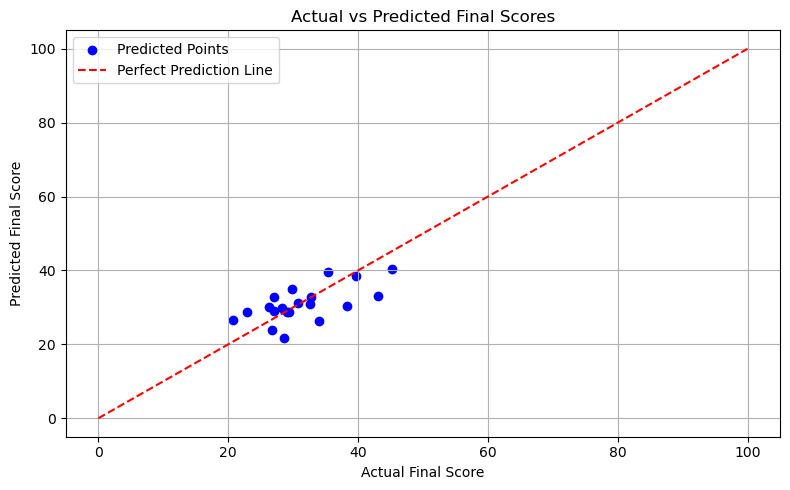

In [1]:
# ➤ Required libraries import pannrom
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ➤ Excel file read pannrom
df = pd.read_excel("Student_Performance_Data.xlsx")  # File name correct ah irukanum

# ➤ Input (X) and Output (y) define pannrom
X = df[['Study_Hours', 'Attendance', 'Quiz_Score', 'Prior_Grade']]
y = df['Final_Score']

# ➤ Dataset ah train & test ku split pannrom (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ➤ Linear Regression model create & train pannrom
model = LinearRegression()
model.fit(X_train, y_train)

# ➤ Test data ku prediction seiyrom
y_pred = model.predict(X_test)

# ➤ Model performance check pannrom
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

# ➤ High Risk student detect seiyrom based on predicted mark < 50
df['Predicted_Score'] = model.predict(X)
df['Risk_Status'] = df['Predicted_Score'].apply(lambda x: 'High Risk' if x < 50 else 'Safe')

# ➤ High Risk students list print pannrom
high_risk_students = df[df['Risk_Status'] == 'High Risk']
print("\nHigh-Risk Students:")
print(high_risk_students[['Study_Hours', 'Attendance', 'Quiz_Score', 'Prior_Grade',
                          'Final_Score', 'Predicted_Score', 'Risk_Status']])

# ➤ Graph plot – actual vs predicted
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue', label='Predicted Points')
plt.plot([0, 100], [0, 100], 'r--', label='Perfect Prediction Line')
plt.xlabel("Actual Final Score")
plt.ylabel("Predicted Final Score")
plt.title("Actual vs Predicted Final Scores")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
